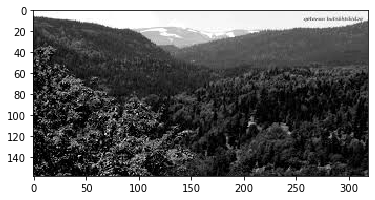

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "dataset\\train"

CATEGORIES = ['0','1']

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array,cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [52]:
print(img_array)

[[255 252 248 ... 234 235 238]
 [247 255 252 ... 237 239 243]
 [250 254 255 ... 241 243 246]
 ...
 [ 42   0  19 ...  75  62  19]
 [ 96  14  15 ...  59  67  46]
 [159  82  56 ...  83 105  74]]


In [53]:
print(img_array.shape)

(158, 319)


In [54]:
IMG_SIZE = 100

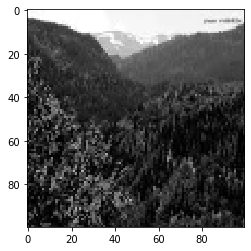

In [55]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [56]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████| 200/200 [00:00<00:00, 1038.87it/s]


386


In [57]:
import random

random.shuffle(training_data)

In [58]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
1
1
1
0
1
1
1


In [59]:
X = []
y = []

In [60]:
for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 84]
   [ 84]
   [ 77]
   ...
   [ 28]
   [ 26]
   [ 19]]

  [[ 94]
   [ 85]
   [ 77]
   ...
   [ 25]
   [ 25]
   [ 21]]

  [[ 98]
   [ 87]
   [ 79]
   ...
   [ 24]
   [ 26]
   [ 21]]

  ...

  [[114]
   [117]
   [106]
   ...
   [127]
   [118]
   [117]]

  [[124]
   [120]
   [101]
   ...
   [122]
   [119]
   [119]]

  [[144]
   [128]
   [ 94]
   ...
   [115]
   [121]
   [118]]]]


In [61]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [62]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)